In [65]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
fertility = fetch_ucirepo(id=244) 
  
# data (as pandas dataframes) 
X = fertility.data.features 
y = fertility.data.targets 
  
# metadata 
print(fertility.metadata) 
  
# variable information 
print(fertility.variables) 


{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'ID': 429, 'type': 'NATIVE', 'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girel

In [66]:

""" y[y['diagnosis'] == "N"] = 1 
y[y['diagnosis'] == "O"] = -1  """

#y.loc[:, 'diagnosis'] = y['diagnosis'].replace({'N': 1, 'O': -1})
#y = y.astype(float)

y = (y['diagnosis'] == 'N').astype(float)
y[y == 0] = -1

# Convert to numpy array and reshape to ensure it's a column vector
# y = y.values.reshape(-1, 1)

In [67]:
y

0     1.0
1    -1.0
2     1.0
3     1.0
4    -1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: diagnosis, Length: 100, dtype: float64

In [68]:

# Convert to numpy array and reshape to ensure it's a column vector

y = y.values.reshape(-1, 1)
#y = np.array(y)


In [69]:
y

array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
      

In [70]:
X_and_Y = np.hstack((X, y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(y.shape)
print(X.shape)
print(X_and_Y[0])

(100, 1)
(100, 9)
[-0.33  0.92  1.    1.    0.    1.    1.   -1.    0.63  1.  ]


In [71]:
unique_values = np.unique(y)
print("Unique values in y:", unique_values)
print(y.dtype)  # Check the dtype if y is a NumPy array

Unique values in y: [-1.  1.]
float64


In [72]:

from sklearn.model_selection import train_test_split, GridSearchCV
#import seaborn as sns

partitions = [0.2, 0.5, 0.8]

for partition in partitions:


    for trial in range(3):
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=partition, random_state=0)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth':D_list}
        estimator = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)

        grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring="accuracy")

        grid_search.fit(X_train, Y_train)
        
        # Get best model and calculate accuracies
        train_acc = grid_search.score(X_train, Y_train)
        val_acc = grid_search.best_score_
        test_acc = grid_search.score(X_test, Y_test)
        
        # Print results for this trial directly
        print(f"Partition: {partition*100:.0f}/100, Trial: {trial+1}")
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")

    

/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Partition: 20/100, Trial: 1
Train Accuracy: 1.0000
Validation Accuracy: 0.9000
Test Accuracy: 0.7875
Partition: 20/100, Trial: 2
Train Accuracy: 1.0000
Validation Accuracy: 0.9000
Test Accuracy: 0.7875


/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Partition: 20/100, Trial: 3
Train Accuracy: 1.0000
Validation Accuracy: 0.9000
Test Accuracy: 0.7875
Partition: 50/100, Trial: 1
Train Accuracy: 0.9000
Validation Accuracy: 0.8400
Test Accuracy: 0.8600


/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Partition: 50/100, Trial: 2
Train Accuracy: 0.9000
Validation Accuracy: 0.8400
Test Accuracy: 0.8600
Partition: 50/100, Trial: 3
Train Accuracy: 0.9000
Validation Accuracy: 0.8400
Test Accuracy: 0.8600
Partition: 80/100, Trial: 1
Train Accuracy: 0.8750
Validation Accuracy: 0.8750
Test Accuracy: 0.9000
Partition: 80/100, Trial: 2
Train Accuracy: 0.8750
Validation Accuracy: 0.8750
Test Accuracy: 0.9000
Partition: 80/100, Trial: 3
Train Accuracy: 0.8750
Validation Accuracy: 0.8750
Test Accuracy: 0.9000


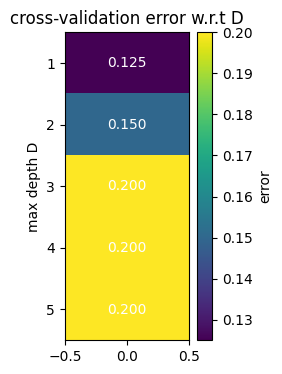

In [73]:
import matplotlib.pyplot as plt

def draw_heatmap(errors, D_list, title):
    plt.figure(figsize=(2, 4))
    plt.imshow(errors, cmap='viridis', aspect='auto')
    plt.colorbar(label='error')
    plt.yticks(range(len(D_list)), D_list)
    plt.ylabel('max depth D')
    plt.title(title)
    
    # Add text annotations
    for i in range(len(D_list)):
        for j in range(errors.shape[1]):
            plt.text(j, i, f'{errors[i, j]:.3f}', 
                     ha='center', va='center', color='white')
    
    plt.show()

# Use the function
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1, 1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')